# **`K-NN Classification`**

In [1]:
import pandas as pd # Data processing
import numpy as np # Linear Algebra
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

> ## **`Importing Data`**

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Prayagv15/K-Nearest-Neighbors-K-NN-/main/Zoo.csv")

In [3]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
df=df.drop(['animal name'],axis=1)

In [5]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
df.isnull().any()

hair        False
feathers    False
eggs        False
milk        False
airborne    False
aquatic     False
predator    False
toothed     False
backbone    False
breathes    False
venomous    False
fins        False
legs        False
tail        False
domestic    False
catsize     False
type        False
dtype: bool

In [7]:
df.isnull().sum().sum()

0

> **`We have no missing data so all entries are valid for usage.`**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [9]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


>> **`We can see that all the animal characteristics are classied as binary values (1-Present/0-Absent) except for legs where it is given as count of legs for a particular animal.`**

# **`Data Visualization`**

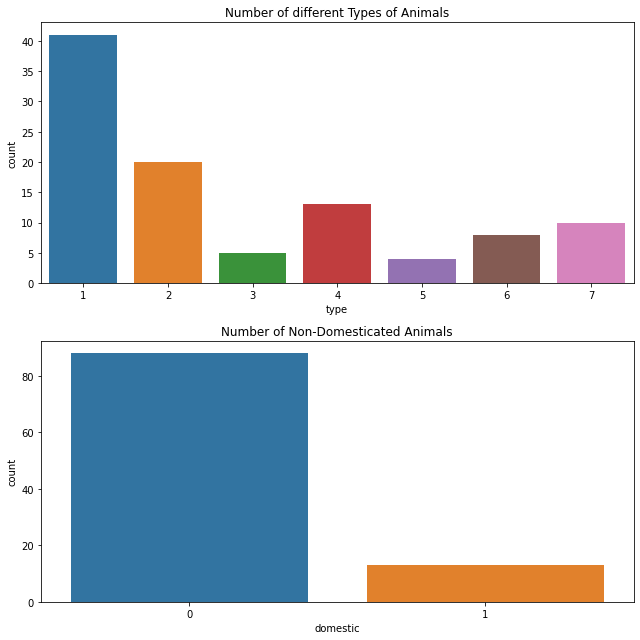

In [10]:
fig,ax=plt.subplots(2,1,figsize=(9,9))

sns.countplot(df['type'],ax=ax[0]).set_title('Number of different Types of Animals')
sns.countplot(df['domestic'],ax=ax[1]).set_title('Number of Non-Domesticated Animals')
plt.tight_layout()

>> **`We can see that animals that belong to Type-1 are in maximum number and from the second plot we can conclude that almost all of the animals are non-domesticated which is obvious.`**

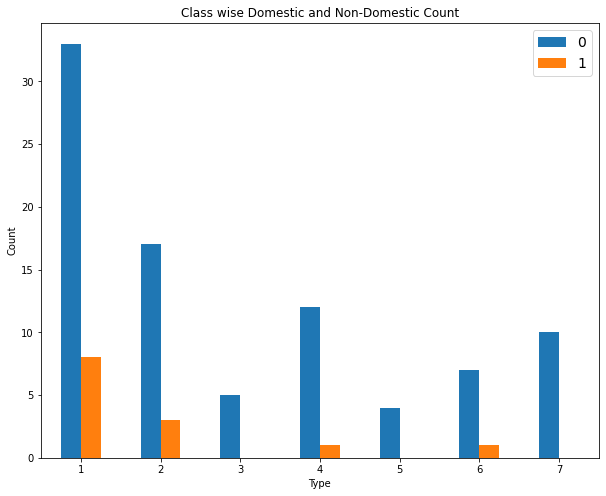

In [11]:
pd.crosstab(df['type'],df['domestic']).plot(kind='bar',figsize=(10,8),title="Class wise Domestic and Non-Domestic Count",rot=0,xlabel='Type',ylabel='Count')
plt.legend(fontsize=14)
plt.plot();

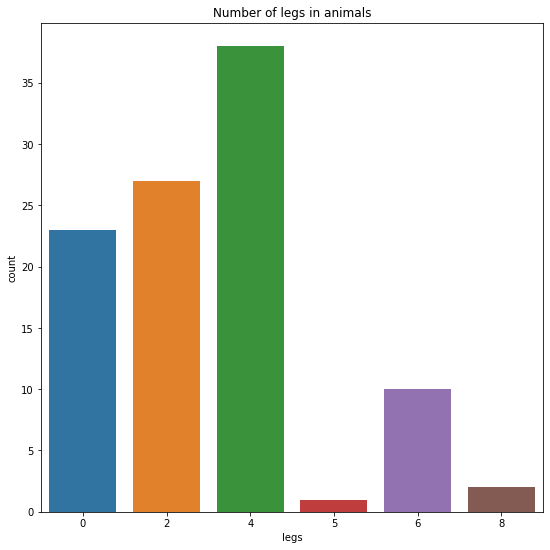

In [12]:
plt.figure(figsize=(9,9))
sns.countplot(df['legs']).set_title('Number of legs in animals');

> **`We can see that most of the animals have four legs.`**

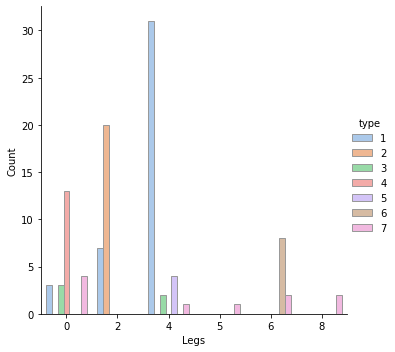

In [13]:
g=sns.catplot(data=df,x='legs',kind='count',hue='type',palette='pastel',edgecolor='0.6');
g.set_axis_labels("Legs","Count");
plt.show();

> **`From the above plot we can see that most of the animals that have four legs belong to Type-1.`**

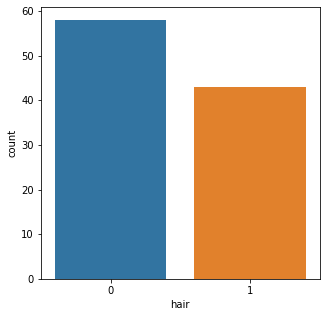

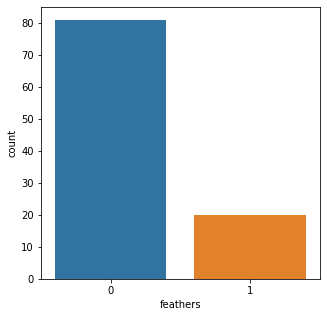

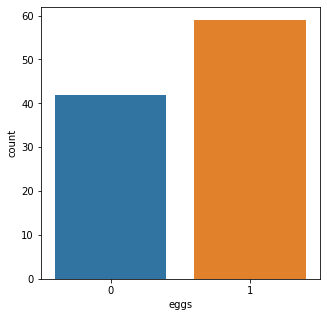

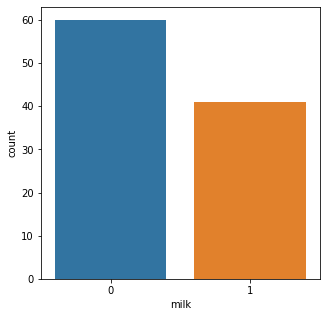

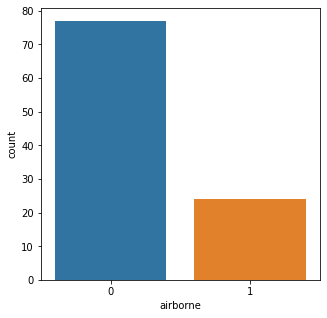

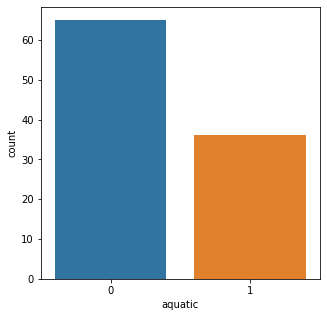

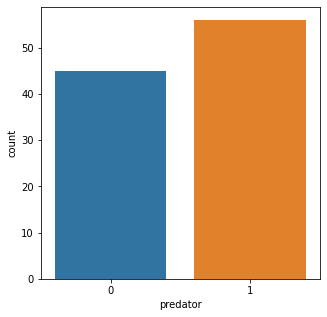

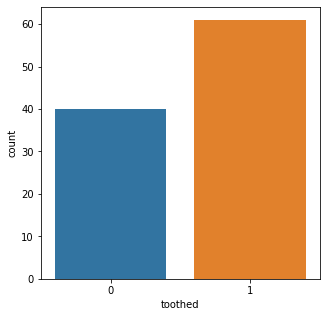

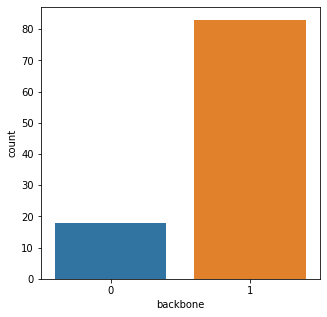

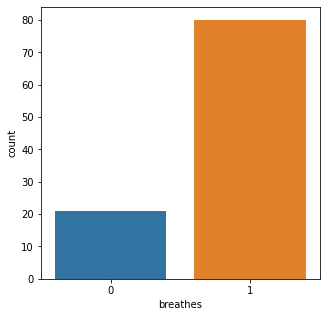

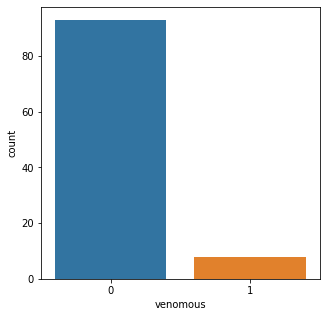

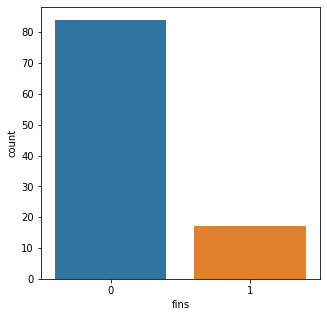

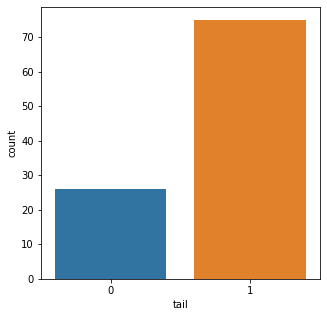

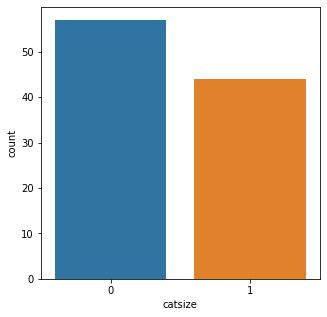

In [14]:
# Plotting the count plot for features below.

features=['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'tail', 'catsize']
for feature in features:
  plt.figure(figsize=(5,5))
  sns.countplot(df[feature])
  plt.show()


> # **`Data Pre-processing`**
>> **`Train-Test split and K-Fold Cross Validation`** 

In [15]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [16]:
x.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize'],
      dtype='object')

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [18]:
print('Shape of x_train: ',x_train.shape)
print('Shape of x_test: ',x_test.shape)
print('Shape of y_train: ' ,y_train.shape)
print('Shape of y_test:' ,y_test.shape)     

Shape of x_train:  (70, 16)
Shape of x_test:  (31, 16)
Shape of y_train:  (70,)
Shape of y_test: (31,)


In [19]:
num_folds=10
kfold=KFold(n_splits=10)

> **`Let's take random K-value.`**


>> **`K = 12, where K indicates the count of the nearest neighbors.`**

In [20]:
model=KNeighborsClassifier(n_neighbors=12)
results=cross_val_score(model,x,y,cv=kfold)

In [21]:
print('Accuracy with K=12 and KFold validation is',np.round(results.mean(),4))

Accuracy with K=12 and KFold validation is 0.78


>>>**`When train-test split is used`**

In [22]:
model=KNeighborsClassifier(n_neighbors=12)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)
print('Training accuracy score: %.3f' %model.score(x_train,y_train))
print('Testing accuracy score %.3f' %model.score(x_test,y_test))
print('Accuracy of model with K=12 using train_test_split',np.round(accuracy_score(y_test,y_pred),4))

Training accuracy score: 0.771
Testing accuracy score 0.677
Accuracy of model with K=12 using train_test_split 0.6774


>> ##  **`We can see that K-Fold validation gives more accuracy.`**

># **`GridSearchCV used for tuning model parameters and selecting the best estimator with optimal score.`**

In [23]:
n_neighbors=np.array(range(1,50))
param_grid=dict(n_neighbors=n_neighbors)

In [24]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=kfold)
grid.fit(x,y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [25]:
print('Accuracy of the model is:',grid.best_score_)
print(grid.best_params_)

Accuracy of the model is: 0.9800000000000001
{'n_neighbors': 1}


**`Lower value of K can overfit the data. If K=1, the instance will be assigned to the same class as it's single nearest neighbors. Lower values of K can have high variance. A model that shows high variance learns a lot and performs well with the training data,and does not generalize with the unseen data. As a result, such a model gives a good results with training dataset but shows high error rate on the test dataset.`**

**`The same can be observed, the model has performed well with the training dataset with the accuracy of 98%.`**

**`Defining K can be balanced act as different values lead to overfitting and underfitting.`**

>>  ## **`The following points must be aware of for choosing K-value.`**

`1.` **`A very low value for K such as K=1 or K=2, can be noisy and lead to the effects of outliers in the model.`**

`2.` **`It is recommended to have an odd number of K to avoid ties in the classification, and cross-validation tactics can help you choose the optimal K for the dataset.`**

`3.` **`It is recommended that K should not be a multiple of a number of classes.`**

In [26]:
n_neighbors=np.array(range(3,50,2))
param_grid=dict(n_neighbors=n_neighbors)
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=kfold)
grid.fit(x,y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39, 41, 43, 45, 47, 49])})

In [27]:
print('Accuracy of the model is:',np.round(grid.best_score_,4))
print(grid.best_params_)

Accuracy of the model is: 0.94
{'n_neighbors': 3}


In [28]:
k_range=range(3,40,2)

k_scores=[]
error_rate=[]

for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(knn,x,y,scoring='accuracy')
  k_scores.append(scores.mean())

pd.Series(k_scores).sort_values(ascending=False)

0     0.930000
1     0.850952
2     0.841429
3     0.791905
4     0.781905
5     0.781905
6     0.781905
7     0.781905
8     0.781905
9     0.741905
10    0.712857
11    0.702857
12    0.702857
13    0.692857
14    0.592857
15    0.573810
16    0.573810
17    0.573810
18    0.563810
dtype: float64

# **`Visualizing the Accuracy results and Error Rates.`**

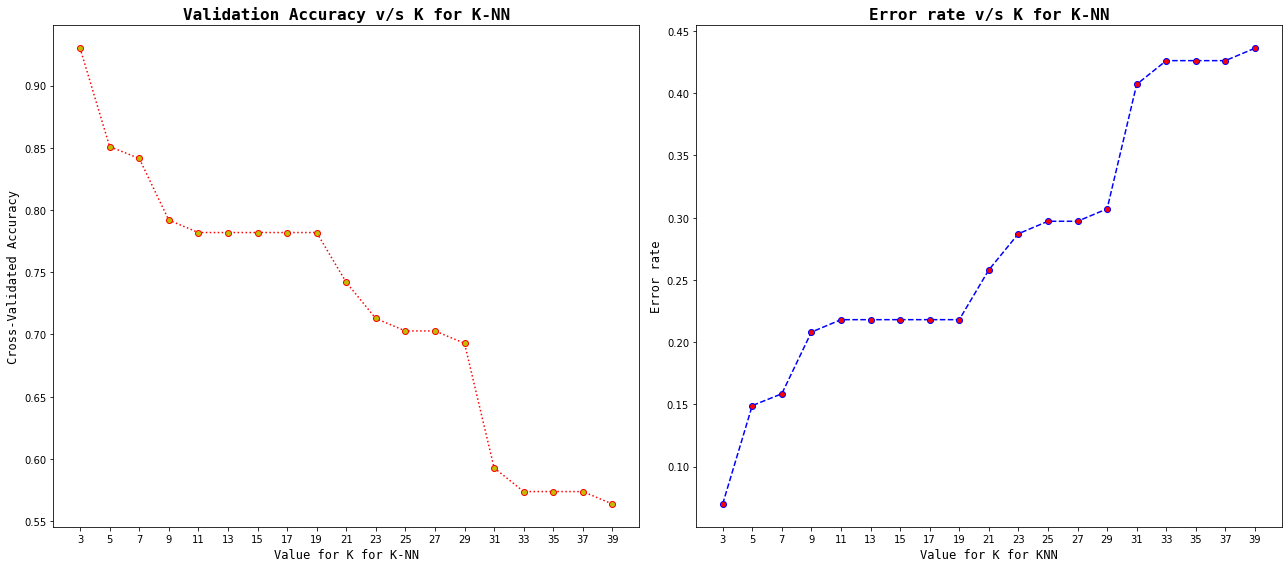

In [29]:
k_range=range(3,40,2)

k_scores=[]
error_rate=[]

for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(knn,x,y,scoring='accuracy')
  k_scores.append(scores.mean())
  error_rate.append((1-scores.mean()))

plt.figure(figsize=(18,8))

plt.subplot(1,2,1)

plt.plot(k_range,k_scores,'o:r',markerfacecolor='y')
plt.title('Validation Accuracy v/s K for K-NN',fontsize=16,family='monospace',fontweight='bold')
plt.xlabel('Value for K for K-NN',fontsize=12,family='monospace')
plt.ylabel('Cross-Validated Accuracy',fontsize=12,family='monospace')
plt.xticks(list(range(3,40,2)))

plt.subplot(1,2,2)
plt.plot(k_range,error_rate,'b--o',markerfacecolor='r')
plt.title('Error rate v/s K for K-NN',fontsize=16,family='monospace',fontweight='bold')
plt.xlabel('Value for K for KNN',fontsize=12,family='monospace')
plt.ylabel('Error rate',fontsize=12,family='monospace')
plt.xticks(list(range(3,40,2)))

plt.tight_layout()
plt.show()

##  **`How to select the optimal K-value?`**

1. **`Use an error plot or accuracy plot to find the most favorable K-value.`**

2. **`When we derive the plot between accuracy and K denoting values in a defined range. We choose K-value having higher accuracy score.`**

3. **`When we derive the plot between error rate and K denoting values in a defined range. We choose the K-value having a minimum error rate.`**

4. **The optimal K value usually found is the $\sqrt{N}$, where $N$ is the total number of samples.**

>>* *In the plot above we see that for K = 3 has a minimum error rate.*

>>* *In the accuracy plot we see that for K = 3 has maximum accuracy score.*

>>*  *Therefore optimal value of K is 3.*


> # **`Evaluating model performance`**

In [30]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)
result1=classification_report(y_test,y_pred)
print('Accuracy with k=3 using train_test_split',np.round(accuracy_score(y_test,y_pred),4))
print("\nClassification Report\n",result1)


Accuracy with k=3 using train_test_split 0.9355

Classification Report
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.94        31
   macro avg       0.79      0.81      0.79        31
weighted avg       0.92      0.94      0.92        31



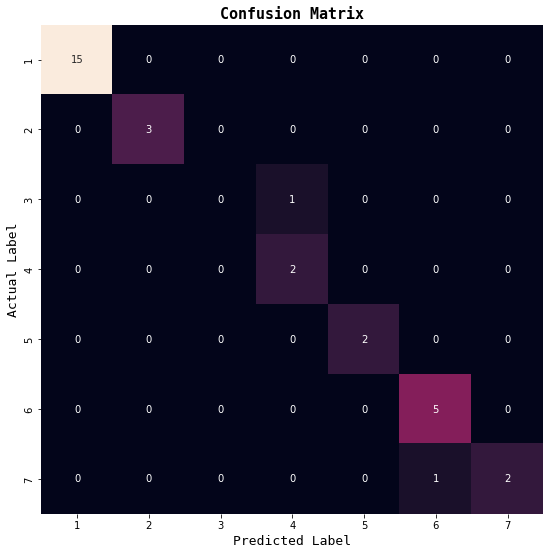

In [31]:
cm=confusion_matrix(y_test,y_pred)
class_labels=[1,2,3,4,5,6,7]
df_cm=pd.DataFrame(cm,index=class_labels,columns=class_labels)
plt.figure(figsize=(9,9))
sns.heatmap(df_cm,annot=True,fmt='d',cbar=False)
plt.title("Confusion Matrix",fontsize=15,family='monospace',fontweight='bold')
plt.xlabel('Predicted Label',fontsize=13,family='monospace')
plt.ylabel('Actual Label',fontsize=13,family='monospace')
plt.show()

>>> **`From the above confusion matrix we can see that an animal belonging to type-3 is marked as type-4 and an animal belonging to type-7 is marked as type-6.`**

> # **`Visualizing model performance`**

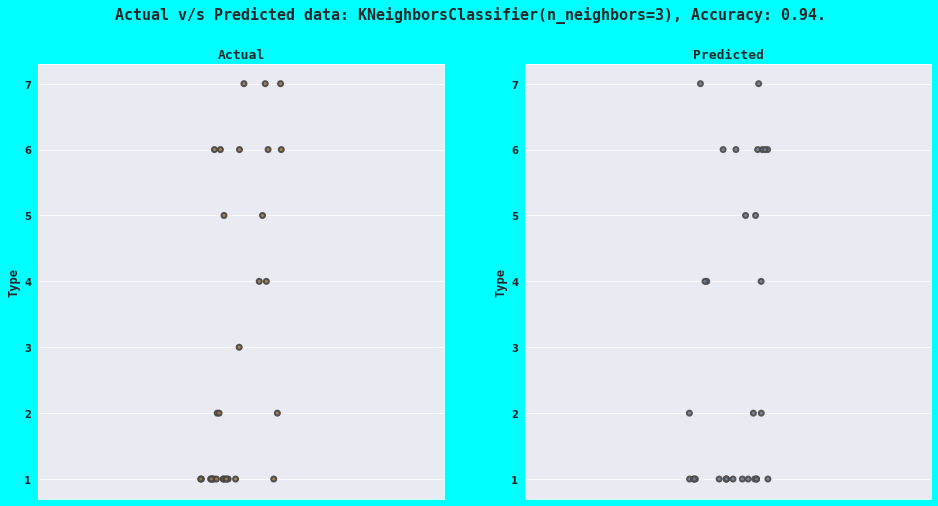

In [34]:
ax=plt.figure(figsize=(16,8))
ax.set_facecolor("cyan")
plt.subplot(1,2,1)
sns.set_style('darkgrid')
sns.stripplot(y=y_test,hue=y,data=df,palette='cubehelix_r',marker="o", linewidth=2, alpha=.9);
plt.ylabel('Type',family='monospace',fontweight='bold',fontsize=12)
plt.yticks(fontweight='bold')
plt.title('Actual',family='monospace',fontweight='bold',fontsize=13)

plt.subplot(1,2,2)
sns.set_style('darkgrid')
sns.stripplot(y=y_pred,hue=y,data=df,palette='bone_r',linewidth=2, alpha=.9)
plt.ylabel('Type',family='monospace',fontweight='bold',fontsize=12)
plt.yticks(fontweight='bold')
plt.title('Predicted',family='monospace',fontweight='bold',fontsize=13);

plt.suptitle('Actual v/s Predicted data: KNeighborsClassifier(n_neighbors=3), Accuracy: 0.94.',fontsize=15,family='monospace',fontweight='bold',ha='center')
plt.show()

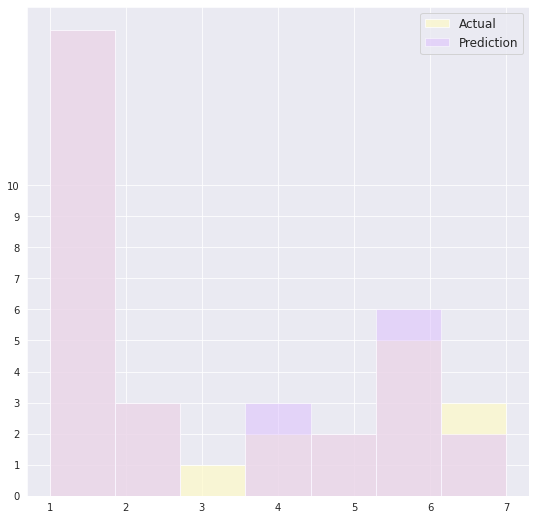

In [33]:
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(y_test, color = '#fffac8', alpha = 0.7, label = 'Actual', bins=7)
ax.hist(y_pred, color = '#debeff', alpha = 0.5, label = 'Prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best',fontsize=12)
plt.show()

>### **`This figure tells us the total number of animals in each class according to the test data and predicted data.`**



>>#### **`Color overlap indicates that prediction matches actual classification. In two cases model failed to identify an animal belonging to their original class which explains the accuracy of the model.`**